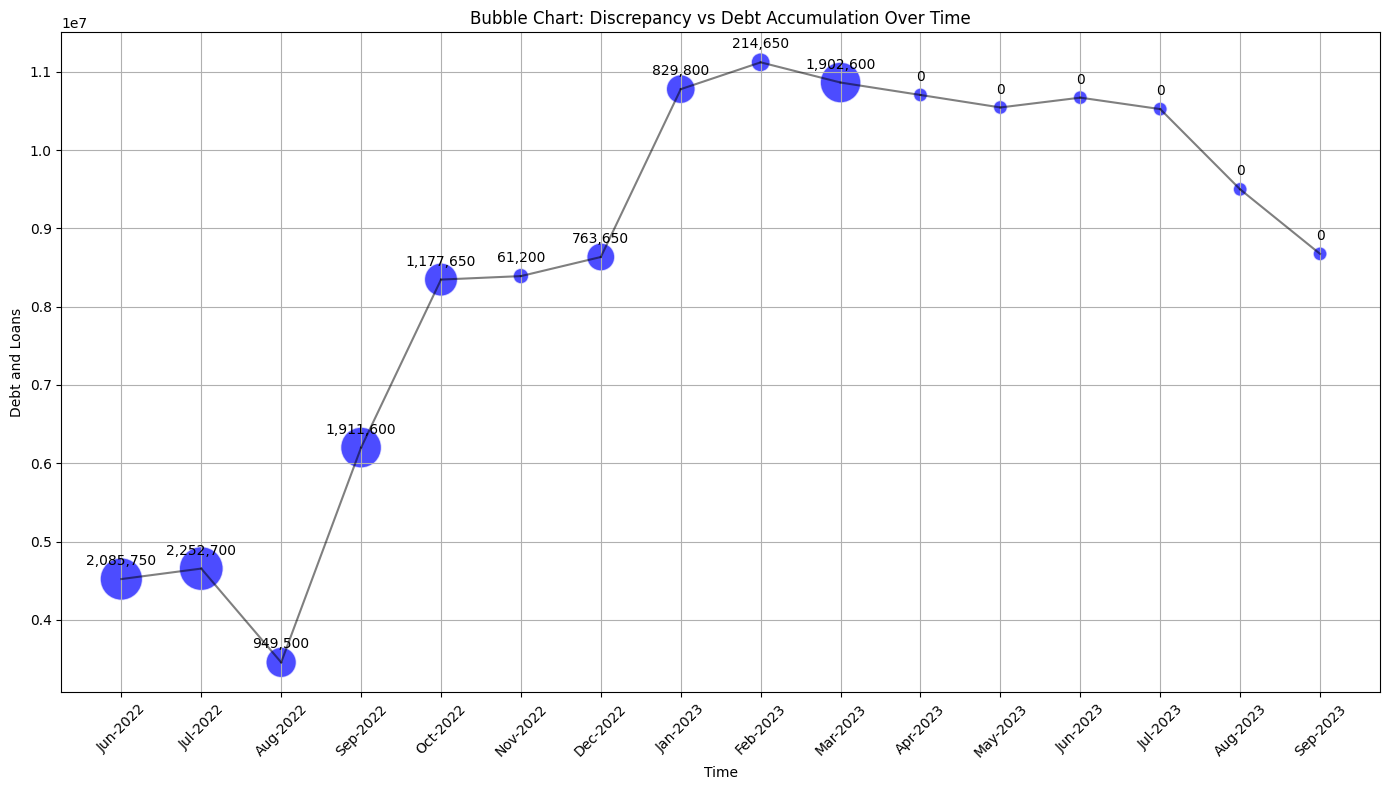

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Assuming your CSV file is named 'your_data_file.csv'
data = pd.read_csv('/content/drive/MyDrive/BDM Capstone/Processed Raw data/inventory and debt - Sheet1.csv')
# Combine 'Month' and 'Year' columns into a new 'Month_Year' column with only the first three characters of the month
data['Month_Year'] = data['month'].astype(str).str[:3] + '-' + data['year'].astype(str)


# Assuming your columns are named 'month', 'year', 'inventory_in_inr', 'debt and loans', 'descrepency_in_inr'
# You might need to adjust these column names based on your actual data.
x = data['Month_Year']
y = data['debt and loans']
size = data['descrepency_in_inr']

# Normalize the size values to avoid large bubbles
scaler = MinMaxScaler(feature_range=(100, 1000))
size_normalized = scaler.fit_transform(size.values.reshape(-1, 1))


plt.figure(figsize=(14, 8))

# Plot connecting lines
for i in range(1, len(x)):
    plt.plot([x.iloc[i - 1], x.iloc[i]], [y.iloc[i - 1], y.iloc[i]], 'k-', alpha=0.5)
plt.scatter(x, y, s=size_normalized, alpha=0.7, c='blue', edgecolors='w', linewidth=1)
for i in range(0, len(x)):
    # Annotate points with labels
    plt.annotate(f'{size.iloc[i]:,.0f}', (x.iloc[i], y.iloc[i]), textcoords="offset points", xytext=(0, 10), ha='center')

plt.title('Bubble Chart: Discrepancy vs Debt Accumulation Over Time')
plt.xlabel('Time')
plt.ylabel('Debt and Loans')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


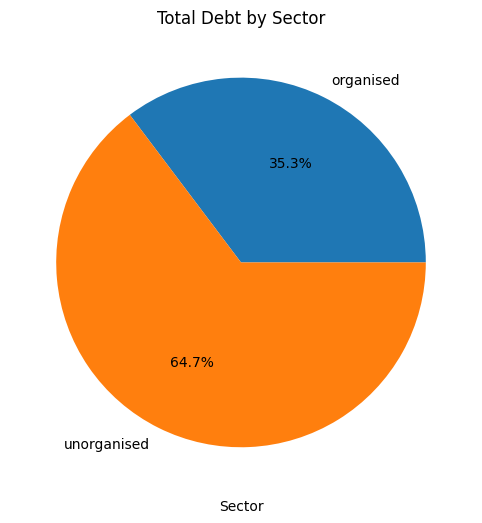

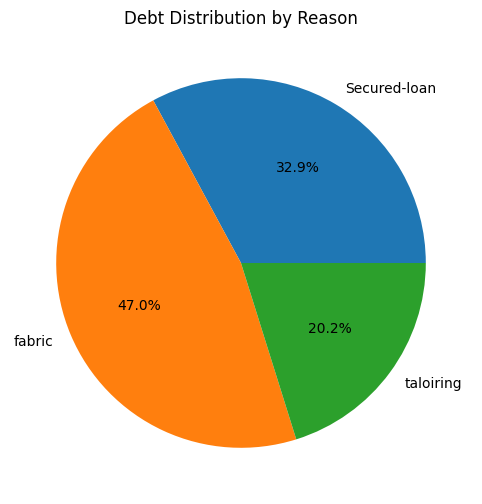

In [26]:
# Load the CSV file into a DataFrame
file_path = '/content/drive/MyDrive/BDM Capstone/Processed Raw data/Current loan And Credits - Sheet1.csv'  # Update the path to your CSV file
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to check the data
df.head()

# Visualization 1: Bar chart of total debt by sector
sector_debt = df.groupby('sector')['amount'].sum()
sector_debt.plot(kind='pie', autopct='%1.1f%%', figsize=(10, 6))
plt.title('Total Debt by Sector')
plt.xlabel('Sector')
plt.ylabel('')
plt.show()

# Visualization 2: Pie chart of debt distribution by reason
reason_debt = df.groupby('reason')['amount'].sum()
reason_debt.plot(kind='pie', autopct='%1.1f%%', figsize=(10, 6))
plt.title('Debt Distribution by Reason')
plt.ylabel('')
plt.show()

In [29]:
reason_debt.head

<bound method NDFrame.head of reason
Secured-loan    2877460
fabric          4110000
taloiring       1765000
Name: amount, dtype: int64>